In [1]:
%load_ext autoreload
%autoreload 2

from ppg_project.training_pipeline import XGBoostTrainingPipeline
from ppg_project.dtypes import XGBoostTrainingPipelineConfig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

from ppg_project import utils

In [2]:
config = XGBoostTrainingPipelineConfig( data_path="../sample")
pipe = XGBoostTrainingPipeline(config)
data = pipe.train
target = pipe.train_label
col = [c for c in data.columns if c.startswith('ppg')]

Loading data...


<h1> Show original signal <h1>

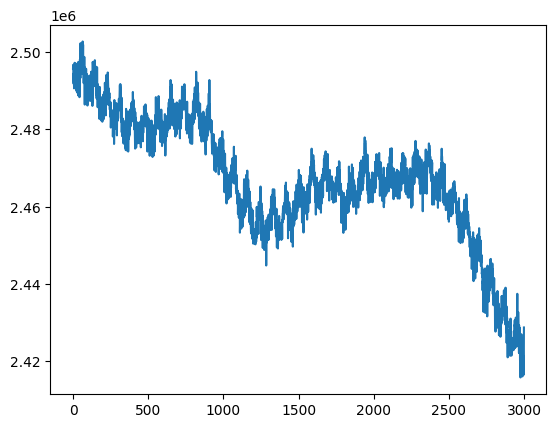

In [3]:
original_signal= data[col].iloc[0].values
plt.plot(original_signal)

<h1> Filtering signal <h1>

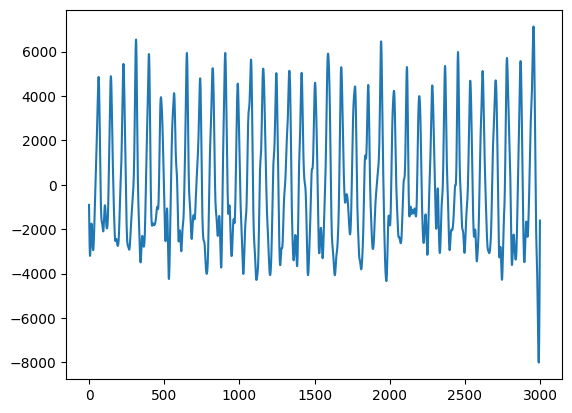

In [5]:
filtered_signal = utils.butter_bandpass_filter(original_signal, 0.5, 5, 100, order=3)
plt.plot(filtered_signal.T)

<h1> Peak Detection Analysis <h1>

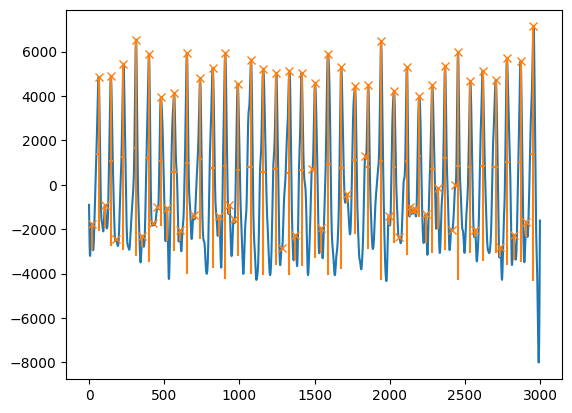

In [6]:
x = filtered_signal
peaks, properties = find_peaks(x, prominence=0,width=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

<h1> Spectrogram Analysis <h1>

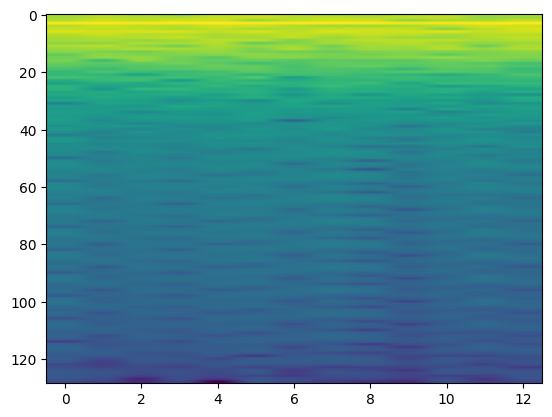

In [7]:
frequencies, times, spec = utils.get_log_spectrogram_features(filtered_signal, 100)
plt.imshow(spec, aspect='auto')

<h1> Wavelet Analysis <h1>

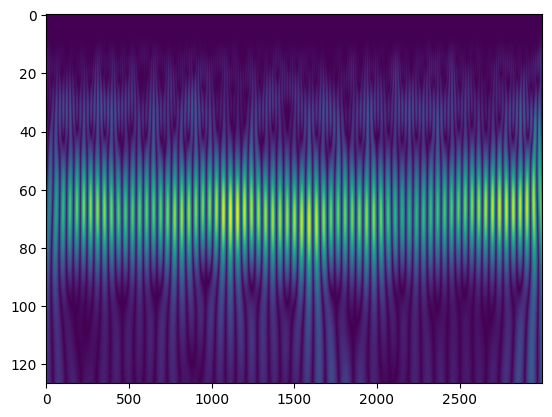

In [8]:
frequencies, wav = utils.get_wavelet_features(filtered_signal, 100)
plt.imshow(wav, aspect='auto')